In [1]:
import pickle
import pandas as pd
import cobra
from collections import defaultdict, OrderedDict, Counter
from cobra import Reaction, Metabolite, Model, Gene
import time
from glob import glob

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import sympy
from sympy import to_dnf, Add
from Bio import SeqIO
import re
import os
import scipy
import urllib
import scipy.stats as stats
from statsmodels.stats.multitest import *

%matplotlib inline

In [2]:
from datetime import datetime

# pseudomonas, longitudinal 1

In [89]:
Study_3['Comments'].iloc[0]

'We performed a short-term longitudinal, population-level analysis of P. aeruginosa isolated from a single CF patient. 233 P. aeruginosa isolates were collected from twelve sputum specimens obtained over a one-year period for whole-genome sequencing and antimicrobial susceptibility profiling.'

/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


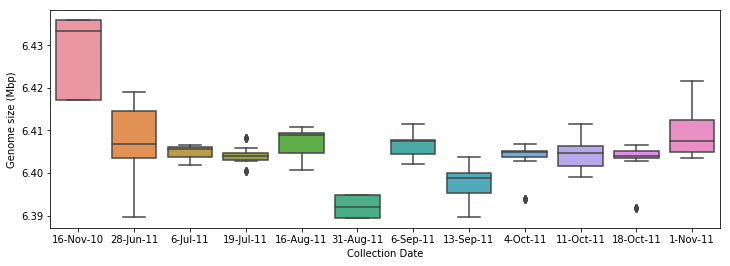

In [67]:
info = pd.read_csv("/home/yara/Documents/cystic_fibrosis/data/pseudomonas/FT_LRI_f2.csv", dtype = {'Genome ID':str})
Study_3 = info.loc[(info['Study'] == 'Study_3') ]
Study_3['Collection Date'] = Study_3['Collection Date'].replace('20','', regex = True)
my_dates = Study_3['Collection Date'].tolist()
my_dates.sort(key=lambda date: datetime.strptime(date, "%d-%b-%y"))
Study_3 = Study_3.set_index('Collection Date').loc[my_dates].reset_index()
Study_3['Genome size (Mbp)'] = Study_3['Genome Length']/10**6
# Study_3.iloc[0].to_dict()
fig, ax = plt.subplots(1,1,figsize = (12, 4))
sns.boxplot(y = 'Genome size (Mbp)', x = 'Collection Date', data = Study_3, ax = ax)

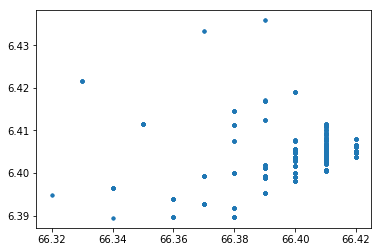

In [84]:
plt.plot(Study_3['GC Content'], Study_3['Genome size (Mbp)'],'.')

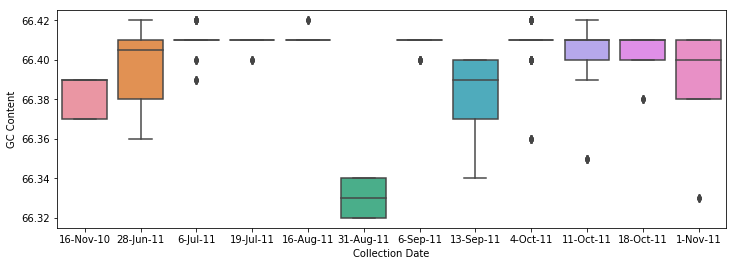

In [70]:
fig, ax = plt.subplots(1,1,figsize = (12, 4))
sns.boxplot(y = 'GC Content', x = 'Collection Date', data = Study_3, ax = ax)

# pseudomonas, longitudinal 2

In [74]:
to_plot.columns

Index(['Patient', 'Isolatea', 'Yr isolated', 'BioSample no.', 'Accession no.',
       'Genome size (bp)', 'CDSsb', 'No. of contigs', 'N50',
       'Genome size (Mbp)'],
      dtype='object')

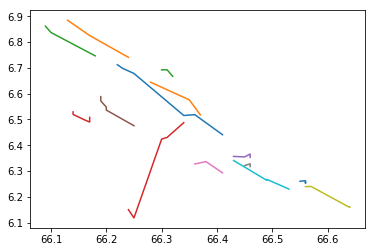

In [78]:
Study_2_metadata = pd.read_csv('/home/yara/Documents/cystic_fibrosis/data/pseudomonas/Study_2_metadata.csv')
Study_2_metadata['Genome size (Mbp)'] = [float(x.replace(',',''))/10**6 for x in Study_2_metadata['Genome size (bp)']]
Study_2_metadata = Study_2_metadata.merge(info, left_on='Accession no.', right_on = 'GenBank Accessions')
for p in set(Study_2_metadata['Patient']):
    to_plot = Study_2_metadata.loc[Study_2_metadata['Patient'] == p]
    to_plot = to_plot.sort_values(by = 'GC Content')
    if len(to_plot) > 2:
#         plt.figure()
#         plt.plot(to_plot['Yr isolated'], to_plot['Genome size (Mbp)'], '-')
        plt.plot(to_plot['GC Content'], to_plot['Genome size (Mbp)'], '-')

/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


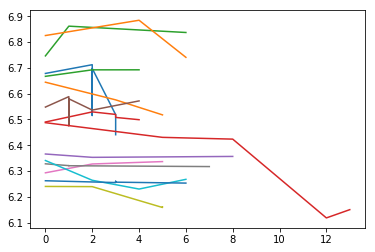

In [66]:
Study_2_metadata = pd.read_csv('/home/yara/Documents/cystic_fibrosis/data/pseudomonas/Study_2_metadata.csv')
Study_2_metadata['Genome size (Mbp)'] = [float(x.replace(',',''))/10**6 for x in Study_2_metadata['Genome size (bp)']]
Study_2_metadata = Study_2_metadata.merge(info, left_on='Accession no.', right_on = 'GenBank Accessions')
for p in set(Study_2_metadata['Patient']):
    to_plot = Study_2_metadata.loc[Study_2_metadata['Patient'] == p]
    to_plot['Yr isolated'] = to_plot['Yr isolated'] - min(to_plot['Yr isolated'])
    if len(to_plot) > 2:
        plt.plot(to_plot['Yr isolated'], to_plot['Genome size (Mbp)'], '-')

In [35]:
scipy.stats.pearsonr(Study_2_metadata['Yr isolated'], Study_2_metadata['Genome size (Mbp)'])

(-0.2906535053840048, 0.02083684856930453)

# pseudomonas, longitudinal 3

In [92]:
min(study_6['Collection Date']), max(study_6['Collection Date'])

('07-05-09', '14-11-08')

/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


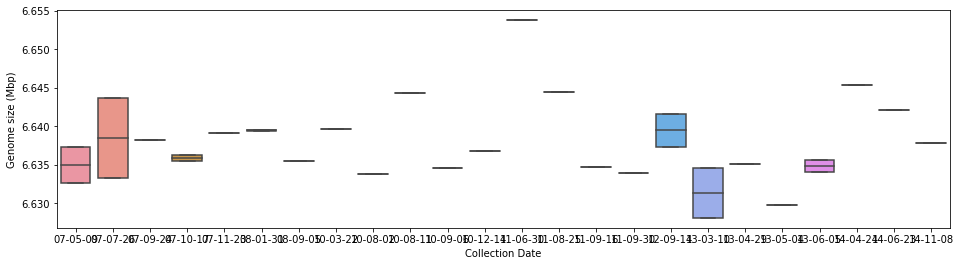

In [79]:
study_6 = info.loc[(info['Study'] == 'Study_6')]
study_6['Collection Date'] = study_6['Collection Date'].replace('20','', regex = True)
my_dates = study_6['Collection Date'].tolist()
my_dates.sort(key=lambda date: datetime.strptime(date, "%y-%m-%d"))
my_dates.remove('07-04-09')
my_dates.remove('07-04-13')
study_6 = study_6.set_index('Collection Date').loc[my_dates].reset_index()
study_6['Genome size (Mbp)'] = study_6['Genome Length']/10**6
# study_6.iloc[0].to_dict()
fig, ax = plt.subplots(1,1,figsize = (16, 4))
sns.boxplot(y = 'Genome size (Mbp)', x = 'Collection Date', data = study_6, ax = ax)

In [113]:
max(study_6['Collection Date']),  min(study_6['Collection Date'])

('14-11-08', '07-05-09')

In [25]:
(max( study_6['Genome size (Mbp)']) - min( study_6['Genome size (Mbp)']))*10**6

25662.99999999977

Text(0.5, 0, 'Time')

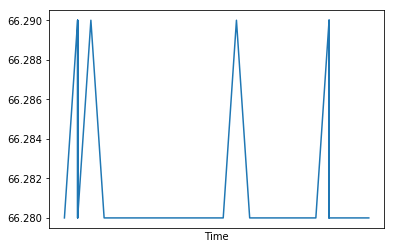

In [40]:
plt.plot(study_6['Collection Date'], study_6['GC Content'])
plt.xticks([],[])
plt.xlabel('Time')

Text(0.5, 0, 'Time')

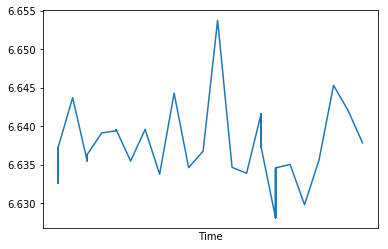

In [50]:
plt.plot(study_6.loc[study_6['GC Content'] == 66.28]['Collection Date'], study_6.loc[study_6['GC Content'] == 66.28]['Genome size (Mbp)'])
plt.xticks([],[])
plt.xlabel('Time')

# S. aureus

In [111]:
patric_FT = pd.read_csv('/home/yara/Documents/staph_clinical_isolates/data/metadata/PATRIC_FT.csv', low_memory = False, dtype = {'Genome ID': str})
SoI_FT = pd.read_csv('/home/yara/Documents/cystic_fibrosis/data/staphylococcus/FT_LRI.csv', dtype = {'Genome ID':str})
SoI_FT['Genome size (Mbp)'] = SoI_FT['Sequence length']/10**6
SoI_FT = SoI_FT.merge(patric_FT, on = 'Genome ID', how = 'left')

In [4]:
ankrum_st = pd.read_excel('/home/yara/Documents/cystic_fibrosis/data/staphylococcus/metadata/ankrum_study.xlsx', skiprows = 1).fillna('')

for index in ankrum_st.index:
    ankrum_st.loc[index,'PatientNo'] = ankrum_st.loc[index, 'PatientNo'] if ankrum_st.loc[index, 'PatientNo'] != '' else ankrum_st.loc[index, 'Unnamed: 2']
    ankrum_st.loc[index, 'Date'] = ankrum_st.loc[index, 'Date'] if ankrum_st.loc[index, 'Date'] != '' else ankrum_st.loc[index, 'Unnamed: 4']
del ankrum_st['Unnamed: 2']
del ankrum_st['Unnamed: 4']

ankrum_st['Patient_ID'] = [re.findall('[A-Z][a-z]+[0-9]+', x)[0]if str(x) != '' else x for x in ankrum_st['PatientNo']]
ankrum_st = ankrum_st.drop(ankrum_st.loc[ankrum_st['Patient_ID'] == ''].index)
ankrum_st = SoI_FT.merge(ankrum_st, left_on = 'Strain', right_on = 'SampleID', how = 'inner')

In [23]:
c = "Staphylococcus aureus is often an early colonizer of Cystic fibrosis (CF) patients that is later replaced by Pseudomonas aeruginosa. Co-infection with both bacteria is correlated with poor prognosis and decreases the lifespan of the patient. We have sequenced clinical isolates of S. aureus from patients co-infected with both pathogens. Isolates were obtained from the CF Biospecimen Registry (CFBR) at Emory University + Children's Center for Cystic Fibrosis and Airways Disease Research."
Counter(SoI_FT.loc[SoI_FT['Comments'] == c] ['Collection Date']) #.iloc[0].to_dict()

Counter({'2012-01-04': 1,
         '2012-01-17': 3,
         '2012-01-25': 1,
         '2012-02-01': 1,
         '2012-02-08': 1,
         '2012-02-13': 1,
         '2012-02-21': 1,
         '2012-02-22': 1,
         '2012-03-26': 1,
         '2012-04-03': 1,
         '2012-04-12': 1,
         '2012-04-16': 1,
         '2012-04-24': 1,
         '2012-05-16': 1,
         '2012-05-21': 1,
         '2012-05-29': 1,
         '2012-06-27': 3,
         '2012-07-16': 2,
         '2012-08-02': 1,
         '2012-08-30': 1,
         '2012-09-20': 1,
         '2012-10-03': 1,
         '2012-10-04': 1,
         '2012-10-15': 1,
         '2013-01-08': 1,
         '2013-04-05': 1,
         '2017-01-03': 1,
         '2017-01-27': 1,
         '2017-03-16': 1,
         '2017-04-05': 2,
         '2017-05-25': 2,
         '2018': 12})

In [18]:
OrderedDict(sorted(Counter(SoI_FT.loc[SoI_FT['cystic_fibrosis_status'] == 1]['Comments']).items(), key = lambda a: a[1], reverse = True))

OrderedDict([('Population dynamics of S. aureus in Cystic Fibrosis patients to determine transmission events utilizing WGS. This study uses whole genome sequencing (WGS) to determine strain relatedness and assess population dynamics of Staphylococcus aureus isolates from a cohort of CF patients as assessed by strain relatedness. 311 S. aureus isolates were collected from respiratory cultures of 115 CF patients during a 22 month study period.',
              291),
             ("Staphylococcus aureus is often an early colonizer of Cystic fibrosis (CF) patients that is later replaced by Pseudomonas aeruginosa. Co-infection with both bacteria is correlated with poor prognosis and decreases the lifespan of the patient. We have sequenced clinical isolates of S. aureus from patients co-infected with both pathogens. Isolates were obtained from the CF Biospecimen Registry (CFBR) at Emory University + Children's Center for Cystic Fibrosis and Airways Disease Research.",
              50),
     

In [12]:
SoI_FT.loc[SoI_FT['cystic_fibrosis_status'] == 1].shape

(347, 91)

In [16]:
Counter(ankrum_st['Comments'])

Counter({'Population dynamics of S. aureus in Cystic Fibrosis patients to determine transmission events utilizing WGS. This study uses whole genome sequencing (WGS) to determine strain relatedness and assess population dynamics of Staphylococcus aureus isolates from a cohort of CF patients as assessed by strain relatedness. 311 S. aureus isolates were collected from respiratory cultures of 115 CF patients during a 22 month study period.': 289})

In [9]:
len(set(ankrum_st['Patient_ID'])), len(ankrum_st)

(113, 289)

In [26]:
(max(to_plot['GC Content']) - min(to_plot['GC Content'])) > 0.1

False

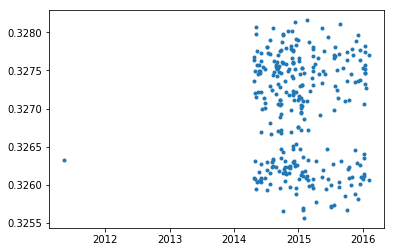

In [30]:
plt.plot(ankrum_st['Date'], ankrum_st['GC content'],'.')

In [107]:
int(str(max(ankrum_st['Date'])- min(ankrum_st['Date'])).split(' ')[0])

1726

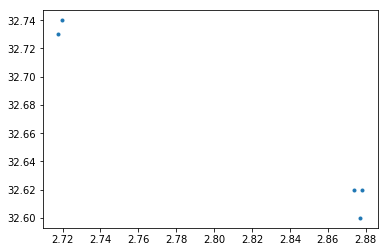

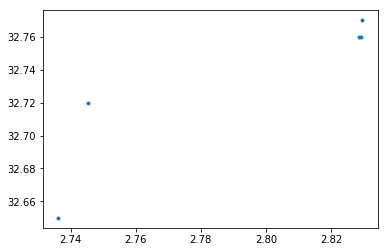

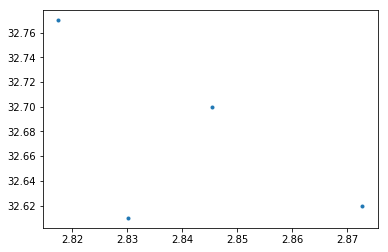

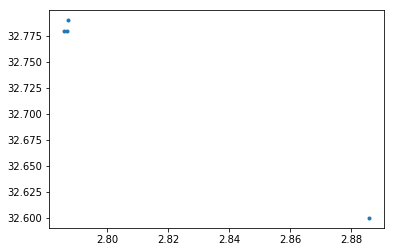

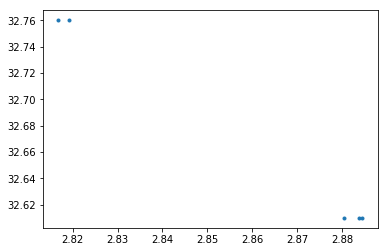

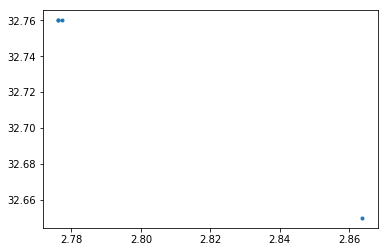

In [109]:
patients = [x for x,y in Counter(ankrum_st['Patient_ID']).items() if y > 3]

rows = []
for p in patients:
#     
    to_plot = ankrum_st.loc[ankrum_st['Patient_ID'] == p].sort_values(by = 'Date')
    to_plot = to_plot.loc[to_plot['Date'] >pd.Timestamp('2014-01-01')]
    pearsonr, pval = scipy.stats.pearsonr([x.timestamp() for x in to_plot['Date']], to_plot['Genome size (Mbp)'])
    rows.append({'Patient':p, 'Pearsonr':pearsonr, 'Pval':pval})
#     if abs(pearsonr) > 0.8:
#     if (max(to_plot['GC Content']) - min(to_plot['GC Content'])) > 0.1:
    if int(str(max(ankrum_st['Date'])- min(ankrum_st['Date'])).split(' ')[0]) > 365*3 and (max(to_plot['GC Content']) - min(to_plot['GC Content'])) > 0.1:
        to_plot = to_plot.sort_values(by = 'Date')
        plt.figure()
#         plt.plot(to_plot['Date'], to_plot['Genome size (Mbp)'])

#         plt.plot(to_plot['Date'], to_plot['GC Content'])
        plt.plot(to_plot['Genome size (Mbp)'], to_plot['GC Content'], '.')

In [127]:
res = pd.DataFrame(rows)
res.loc[(abs(res['Pearsonr']) > 0.8) & (res['Pval'] < 0.05)]

,Patient,Pearsonr,Pval
4,Patient123,-0.967382,0.032618
7,Patient066,0.908537,0.032746
22,Patient141,-0.952231,0.003368


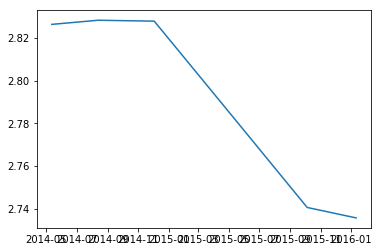

In [129]:
p = 'Patient141'
to_plot = ankrum_st.loc[ankrum_st['Patient_ID'] == p].sort_values(by = 'Date')
to_plot = to_plot.loc[to_plot['Date'] >pd.Timestamp('2014-01-01')]
plt.plot(to_plot['Date'], to_plot['Genome size (Mbp)'])

In [131]:
to_plot

,Unnamed: 0,Genome ID,Isolation Group,Sequencing Depth_x,Directory,Isolation Country_x,Infection/colonization,MLST_x,GC content,N50,...,SampleID,PatientNo,Date,Obs MRMS,Predic MRMS,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Patient_ID
250,424,1280.12545,LRI,163.85,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327749,177689,...,CFSA018,Patient141A,2014-05-12 00:00:00,MRSA,MRSA,,,,,Patient141
225,399,1280.12520,LRI,233.90,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327619,208679,...,CFSA078,Patient141B,2014-08-13 00:00:00,MRSA,MRSA,,,,,Patient141
144,318,1280.12439,LRI,160.75,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327759,154125,...,CFSA148,Patient141C,2014-12-03 00:00:00,MRSA,MRSA,,,,,Patient141
83,257,1280.12373,LRI,146.40,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327451,154820,...,CFSA320,Patient141D,2015-04-29 00:00:00,MRSA,MRSA,,,,,Patient141
48,222,1280.12338,LRI,94.48,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327367,210707,...,CFSA276,Patient141F,2015-10-05 00:00:00,MRSA,MRSA,,,,,Patient141
97,271,1280.12387,LRI,111.86,/home/yara/Documents/UO1/Data/Sequences/prokka...,United States,infection,5,0.327469,296507,...,CFSA287,Patient141G,2016-01-11 00:00:00,MRSA,MRSA,,,,,Patient141


In [124]:
longitudinal_study1 = 'Population dynamics of S. aureus in Cystic Fibrosis patients to determine transmission events utilizing WGS. This study uses whole genome sequencing (WGS) to determine strain relatedness and assess population dynamics of Staphylococcus aureus isolates from a cohort of CF patients as assessed by strain relatedness. 311 S. aureus isolates were collected from respiratory cultures of 115 CF patients during a 22 month study period.'
# longitudinal_study1 = "Staphylococcus aureus is often an early colonizer of Cystic fibrosis (CF) patients that is later replaced by Pseudomonas aeruginosa. Co-infection with both bacteria is correlated with poor prognosis and decreases the lifespan of the patient. We have sequenced clinical isolates of S. aureus from patients co-infected with both pathogens. Isolates were obtained from the CF Biospecimen Registry (CFBR) at Emory University + Children's Center for Cystic Fibrosis and Airways Disease Research."
# https://jcm.asm.org/content/jcm/suppl/2017/06/14/JCM.00164-17.DCSupplemental/zjm999095555s6.pdf

/home/yara/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


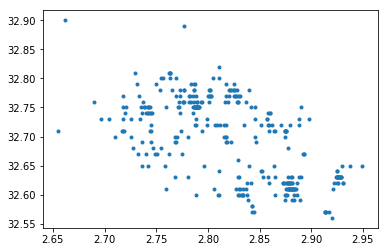

In [125]:
sstudy1 = patric_FT.loc[patric_FT['Comments'] == longitudinal_study1]
sstudy1['Genome size (Mbp)'] = sstudy1['Genome Length']/10**6
plt.plot(sstudy1['Genome size (Mbp)'], sstudy1['GC Content'],'.')

In [120]:
patric_FT = pd.read_csv('/home/yara/Documents/staph_clinical_isolates/data/metadata/PATRIC_FT.csv', low_memory = False, dtype = {'Genome ID': str})
SoI_FT = pd.read_csv('/home/yara/Documents/cystic_fibrosis/data/staphylococcus/FT_LRI.csv', dtype = {'Genome ID':str})
SoI_FT['Genome size (Mbp)'] = SoI_FT['Sequence length']/10**6
SoI_FT = SoI_FT.merge(patric_FT, on = 'Genome ID', how = 'left')

In [ ]:
SoI_FT

In [29]:
SoI_FT.loc[SoI_FT['Genome ID'] == '1280.18588']

,Unnamed: 0,Genome ID,Isolation Group,Sequencing Depth,Directory,Isolation Country,Infection/colonization,MLST,GC content,N50,...,BSI,Catheter,EETN,SST,BJ,UTI,LRI,other,CVS,cystic_fibrosis_status
414,1267,1280.18588,LRI,100.0,/home/yara/Documents/UO1/Data/Sequences/prokka...,USA,infection,5,0.32767,266842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
'1280.18588'